In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import csv
import matplotlib.pyplot as plt


In [3]:
file = "Period1.csv"
file2 = "Period2.csv"

def readfile(filename):
    with open(filename, "r") as f:
        reader = csv.reader(f)
        data_set = list(reader)
        
        data_set = [[element[0].split(" ") for element in data_set],[element[1].split(" ") for element in data_set],[element[2].split(" ") for element in data_set]]
        del data_set[0][0]
        del data_set[1][0]
        del data_set[2][0]
        return data_set

In [4]:
data =readfile(file)

In [88]:
features = pd.DataFrame([[data[1][i],data[2][i]]for i in range(len(data[0]))])
features.columns = ['From', 'To']
# features["link"] = np.nan
                    
year = [i[0] for i in data] 

features['From'] = features['From'].apply(lambda x:x[0])
features['To'] = features['To'].apply(lambda x:x[0])

In [89]:

print(features)

           From       To
0       9909133  9811241
1       9702110  9410212
2       9510041  9210121
3       9703036  9611090
4       9610162  9609159
5       9905085  9803171
6       9303003  9202046
7       9604189  9601152
8       9601175  9507050
9       9801084  9705128
10      9809104  9601116
11      9703138  9603081
12      9609181  9604168
13      9701137  9606165
14      9607051  9401006
15      9608169  9409009
16      9709113  9608015
17      9505073  9207053
18      9811217  9802202
19      9805083  9510182
20      9908147  9808101
21      9704118  9208007
22      9803189  9602052
23      9812028  9609070
24      9707014  9610043
25      9902184  9801052
26      9802168  9709193
27      9607210  9505051
28      9910090  9902055
29      9509147  9509142
...         ...      ...
154806  9312154  9206051
154807  9909183  9908054
154808  9712184  9512059
154809  9705134  9502044
154810  9610042  9608017
154811  9506042  9504029
154812  9610229  9605209
154813  9808143  9611222


In [90]:
def create_graph(data):
    G = nx.Graph()
    
    linked_nodes = [(data['From'][i],data['To'][i])for i in range(len(data))]
    
    G.add_edges_from(linked_nodes)
    
    return G

In [91]:
create_graph(features)

In [78]:
print(linked_nodes)

[('1', '2'), ('1', '3')]


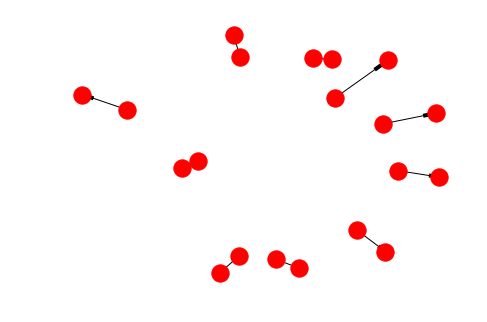

In [31]:
G = nx.DiGraph()
    
linked_nodes = [(features['From'][i],features['To'][i])for i in range(0,10)]
    
G.add_edges_from(linked_nodes)

nx.draw(G)
plt.show()

In [36]:
def common_neighbors(features, G):
    result = []
    for i in range(features.shape[0]):
        a = features['From'][i]
        b = features['To'][i]
#         a = features[0][0]
#         b = features[0][0]
        num_comm_neighbors = 0
        try:
            neighbors_one, neighbors_two = G.neighbors(a), G.neighbors(b)
            for neighbor in neighbors_one:
                if neighbor in neighbors_two:
                    num_comm_neighbors += 1
            result.append((a, b, num_comm_neighbors))
        except:
            pass
    return result

In [37]:
common_neighbors(features, create_graph(features))

[('9909133', '9811241', 0),
 ('9702110', '9410212', 0),
 ('9510041', '9210121', 0),
 ('9703036', '9611090', 0),
 ('9610162', '9609159', 0),
 ('9905085', '9803171', 0),
 ('9303003', '9202046', 0),
 ('9604189', '9601152', 0),
 ('9601175', '9507050', 0),
 ('9801084', '9705128', 0),
 ('9809104', '9601116', 0),
 ('9703138', '9603081', 0),
 ('9609181', '9604168', 0),
 ('9701137', '9606165', 0),
 ('9607051', '9401006', 0),
 ('9608169', '9409009', 0),
 ('9709113', '9608015', 0),
 ('9505073', '9207053', 0),
 ('9811217', '9802202', 0),
 ('9805083', '9510182', 0),
 ('9908147', '9808101', 0),
 ('9704118', '9208007', 0),
 ('9803189', '9602052', 0),
 ('9812028', '9609070', 0),
 ('9707014', '9610043', 0),
 ('9902184', '9801052', 0),
 ('9802168', '9709193', 0),
 ('9607210', '9505051', 0),
 ('9910090', '9902055', 0),
 ('9509147', '9509142', 0),
 ('9512026', '9304087', 0),
 ('9511230', '9511204', 0),
 ('9803117', '9612115', 0),
 ('9501042', '9310042', 0),
 ('9903214', '9203018', 0),
 ('9903029', '981216

In [69]:
graph = create_graph(features)

In [66]:
def common_neighbors2(features, G):
    nb_common_neighbors = []
    for i in range(features.shape[0]):
        a = features['From'][i]
        b = features['To'][i]
        nb_common_neighbors.append(len(sorted(nx.common_neighbors(G, a, b)))) # ajoute le nombre de voisins communs
    return nb_common_neighbors

def CommonNeighbors(a, b, g):
    a_neighbors = set(graph.neighbors(a))
    b_neighbors = set(graph.neighbors(b))
    return len(a_neighbors.intersection(b_neighbors))

In [67]:
common_neighbors2(features, create_graph(features))

[0,
 11,
 3,
 5,
 9,
 19,
 1,
 14,
 4,
 20,
 3,
 9,
 18,
 5,
 9,
 0,
 19,
 20,
 8,
 2,
 21,
 4,
 14,
 9,
 4,
 3,
 12,
 17,
 6,
 2,
 0,
 16,
 13,
 0,
 9,
 0,
 18,
 3,
 0,
 15,
 55,
 1,
 10,
 9,
 1,
 23,
 5,
 6,
 2,
 20,
 122,
 3,
 2,
 0,
 2,
 3,
 15,
 15,
 2,
 11,
 3,
 35,
 14,
 0,
 13,
 14,
 2,
 1,
 2,
 18,
 12,
 10,
 1,
 13,
 7,
 0,
 5,
 2,
 3,
 0,
 13,
 7,
 7,
 0,
 2,
 14,
 12,
 17,
 7,
 14,
 17,
 4,
 9,
 7,
 11,
 12,
 4,
 4,
 10,
 31,
 4,
 27,
 15,
 1,
 11,
 14,
 5,
 0,
 1,
 21,
 5,
 11,
 148,
 7,
 12,
 15,
 28,
 5,
 30,
 25,
 89,
 4,
 3,
 2,
 25,
 0,
 17,
 1,
 28,
 10,
 0,
 14,
 1,
 4,
 2,
 5,
 1,
 38,
 3,
 22,
 12,
 5,
 2,
 9,
 10,
 12,
 49,
 2,
 10,
 1,
 13,
 3,
 10,
 10,
 9,
 2,
 7,
 7,
 10,
 1,
 7,
 10,
 17,
 19,
 7,
 34,
 9,
 3,
 9,
 9,
 17,
 2,
 18,
 0,
 1,
 2,
 1,
 12,
 7,
 1,
 7,
 4,
 12,
 35,
 18,
 2,
 5,
 1,
 2,
 3,
 7,
 2,
 15,
 6,
 11,
 5,
 17,
 14,
 12,
 5,
 4,
 3,
 3,
 16,
 8,
 7,
 3,
 9,
 0,
 3,
 3,
 0,
 14,
 4,
 43,
 15,
 18,
 5,
 3,
 4,
 45,
 13,
 1,
 0,
 11,
 6,
 

In [68]:
def Jaccard_coef(features, G):
    J = []
    for i in range(features.shape[0]):
        a = features['From'][i]
        b = features['To'][i]
        pred = nx.jaccard_coefficient(G, [(a,b)])
        for u,v,p in pred:
            J.append(p)
    return J

In [70]:
Jaccard_coef(features, graph)

[0.0,
 0.11224489795918367,
 0.04838709677419355,
 0.06097560975609756,
 0.075,
 0.2375,
 0.013333333333333334,
 0.08284023668639054,
 0.025,
 0.24390243902439024,
 0.08108108108108109,
 0.05844155844155844,
 0.15789473684210525,
 0.030864197530864196,
 0.09090909090909091,
 0.0,
 0.21839080459770116,
 0.10416666666666667,
 0.09523809523809523,
 0.009302325581395349,
 0.28378378378378377,
 0.07547169811320754,
 0.03341288782816229,
 0.0891089108910891,
 0.005298013245033113,
 0.15789473684210525,
 0.11428571428571428,
 0.20238095238095238,
 0.1016949152542373,
 0.16666666666666666,
 0.0,
 0.38095238095238093,
 0.07975460122699386,
 0.0,
 0.14516129032258066,
 0.0,
 0.06870229007633588,
 0.0967741935483871,
 0.0,
 0.3191489361702128,
 0.11554621848739496,
 0.06666666666666667,
 0.06756756756756757,
 0.09,
 0.010101010101010102,
 0.21100917431192662,
 0.16129032258064516,
 0.08823529411764706,
 0.03508771929824561,
 0.07874015748031496,
 0.122,
 0.023809523809523808,
 0.09523809523809523

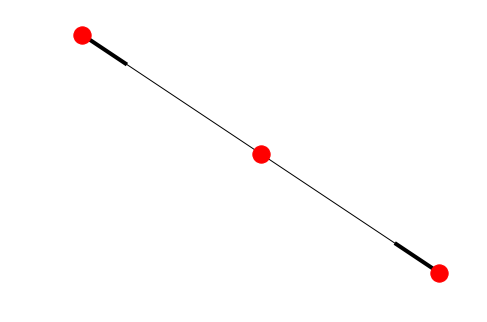

In [61]:
G = nx.DiGraph()
linked_nodes = [('1','2'),('1','3')]

G.add_edges_from(linked_nodes)

nx.draw(G)
plt.show()

In [22]:
data2 = readfile(file2)

In [23]:
features2 = pd.DataFrame([[data2[1][i],data2[2][i]]for i in range(len(data2[0]))])
features2.columns = ['From', 'To']
                    
year2 = [i[0] for i in data] 

features2['From'] = features2['From'].apply(lambda x:x[0])
features2['To'] = features2['To'].apply(lambda x:x[0])

print(features2)

          From       To
0       111094   104090
1       105182     1113
2       103095  9509074
3       104139    10204
4         8173  9705044
5       105193  9503230
6        12067  9912279
7       103089     2117
8        11115  9904179
9         8147  9905046
10      101126  9612121
11       11019  9903205
12      107081  9906234
13       11095  9909202
14        2144  9908128
15      109099   108055
16      111070     3052
17        5145  9902098
18        9022     8190
19      101126  9508154
20      108168  9811172
21      102040  9804072
22      110212  9903255
23        9158     6207
24        5147  9903037
25        4152  9801199
26        6087  9910135
27        9141  9908134
28        7253  9604179
29      109170  9409188
...        ...      ...
98323    12098  9707056
98324   109102    10060
98325   106064  9911100
98326     7153     5031
98327   103170  9802033
98328   104037  9802007
98329   108081     6139
98330   101088  9906167
98331   103106     2228
98332    10094  

In [79]:
linked_nodes = [(features['From'][i],features['To'][i])for i in range(len(features))]
linked_nodes2 = [(features2['From'][i],features2['To'][i])for i in range(len(features2))]

In [12]:
# instance = []
# for nodes in linked_nodes:
#     if nodes in linked_nodes2:
#         instance.append('1')
#     else:
#         instance.append('0')
        
# print(instance)
        

In [81]:
print(len(linked_nodes))    

154836


In [39]:
concat = features['From'].append(features['To'])
# concat.columns = ['nodes', 'links']
# concat["links"] = np.nan
# print(concat)

In [40]:
concat = concat.drop_duplicates()
concat = concat.reset_index(drop=True)

print(concat)

0        9909133
1        9702110
2        9510041
3        9703036
4        9610162
5        9905085
6        9303003
7        9604189
8        9601175
9        9801084
10       9809104
11       9703138
12       9609181
13       9701137
14       9607051
15       9608169
16       9709113
17       9505073
18       9811217
19       9805083
20       9908147
21       9704118
22       9803189
23       9812028
24       9707014
25       9902184
26       9802168
27       9607210
28       9910090
29       9509147
          ...   
16998    9906135
16999    9409171
17000    9712158
17001    9212018
17002    9310094
17003    9203034
17004    9607024
17005    9404154
17006    9401085
17007    9607133
17008    9412234
17009    9301095
17010    9404177
17011    9306149
17012    9911001
17013    9812040
17014    9204093
17015    9611129
17016    9508081
17017     201116
17018    9306051
17019    9403105
17020    9404130
17021    9910108
17022    9312138
17023       3084
17024    9307032
17025    94091

In [28]:
concat2 = features2['From'].append(features2['To'])
concat2 = concat2.drop_duplicates()
concat2 = concat2.reset_index(drop=True)
print(concat2)

0         111094
1         105182
2         103095
3         104139
4           8173
5         105193
6          12067
7         103089
8          11115
9           8147
10        101126
11         11019
12        107081
13         11095
14          2144
15        109099
16        111070
17          5145
18          9022
19        108168
20        102040
21        110212
22          9158
23          5147
24          4152
25          6087
26          9141
27          7253
28        109170
29          4124
          ...   
15535    9901036
15536    9901027
15537    9901043
15538    9707074
15539    9409116
15540    9903181
15541    9410095
15542    9802119
15543    9607200
15544    9701062
15545    9709139
15546    9712198
15547    9401032
15548    9504029
15549     112180
15550    9807148
15551    9611199
15552    9412138
15553    9803026
15554    9608035
15555    9503053
15556    9304072
15557    9904050
15558    9902167
15559    9704124
15560    9708016
15561    9907153
15562    98031

In [49]:
result =[]
for nodes in concat.values:
    if nodes in concat2.values:
        result.append((nodes, '1'))
    else:
        result.append((nodes, '0'))
        
print(result)

[('9909133', '0'), ('9702110', '1'), ('9510041', '1'), ('9703036', '1'), ('9610162', '1'), ('9905085', '1'), ('9303003', '0'), ('9604189', '1'), ('9601175', '0'), ('9801084', '1'), ('9809104', '0'), ('9703138', '0'), ('9609181', '1'), ('9701137', '1'), ('9607051', '1'), ('9608169', '1'), ('9709113', '1'), ('9505073', '1'), ('9811217', '1'), ('9805083', '1'), ('9908147', '0'), ('9704118', '0'), ('9803189', '1'), ('9812028', '1'), ('9707014', '1'), ('9902184', '1'), ('9802168', '1'), ('9607210', '0'), ('9910090', '1'), ('9509147', '1'), ('9512026', '1'), ('9511230', '1'), ('9803117', '1'), ('9501042', '1'), ('9903214', '1'), ('9903029', '1'), ('9902118', '1'), ('9804156', '0'), ('9307166', '1'), ('9904056', '1'), ('9605199', '1'), ('9804072', '1'), ('9711102', '1'), ('9903242', '1'), ('9811195', '1'), ('9805129', '1'), ('9703121', '1'), ('9812143', '1'), ('9503017', '1'), ('9612192', '1'), ('9512062', '1'), ('9805207', '1'), ('9910045', '1'), ('9902059', '1'), ('9610138', '1'), ('9211011

In [84]:
result_list = pd.DataFrame(result[i][1] for i in range(len(result)))
result_list.index = np.arange(1, len(result_list) + 1)
result_list.index.name = 'target id'
result_list.columns = ['label']


# result_list = result_list.apply(lambda x:x[0])


In [85]:
print(result_list)

          label
target id      
1             0
2             1
3             1
4             1
5             1
6             1
7             0
8             1
9             0
10            1
11            0
12            0
13            1
14            1
15            1
16            1
17            1
18            1
19            1
20            1
21            0
22            0
23            1
24            1
25            1
26            1
27            1
28            0
29            1
30            1
...         ...
16999         1
17000         0
17001         1
17002         0
17003         1
17004         1
17005         0
17006         0
17007         0
17008         0
17009         0
17010         0
17011         0
17012         0
17013         1
17014         1
17015         0
17016         0
17017         0
17018         0
17019         0
17020         0
17021         0
17022         1
17023         0
17024         1
17025         0
17026         0
17027         0
17028   

In [87]:
result_list.iloc[0:10000].to_csv('result.csv', sep=',')
